In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from lib.Stream import Stream, BipartiteStream
from lib.TimeNode import TimeNode, TimeNodeSet
from lib.StreamProperties import StreamStarSat, StreamBHACore
from lib.patterns import *
from lib.similarities import *
import logging
import ujson as json
from IPython.display import Image, clear_output

## Stream graph data format

Stream graphs are described as JSON files (see `./tests/integration/fixtures/` for examples), containing the different sets $T$ (the time interval of the whole stream), $V$ (the set of nodes), $W$ (the set of nodes' presences in time), $E$ (the set of edges) and $I$ (the attribute language). If the stream is bipartite, $V$, instead of a single set, contains a dictionary with two keys `left` and `right`, both containing the respective sets of nodes. If $W$ is empty, it is assumed that all nodes of $V$ are present over the full interval $T$.

Similarly for the attribute language $I$: if we are considering bipatterns, we have two keys `left` and `right` corresponding to the attributes associated.

### Bipatterns on bipartite stream
As an example, we show here one bipartite stream formatted for bipatterns enumeration:

In [3]:
basename = "Bipattern-ChangingNeighbours-StSa"
basename = "2-2-bha-core"
json.load(open(f"./tests/integration/fixtures/{basename}.json"))

{'T': {'alpha': 0, 'omega': 10},
 'V': {'left': ['u', 'v', 'w'], 'right': ['x', 'y', 'z']},
 'W': {},
 'E': [{'b': 2,
   'e': 4,
   'u': 'u',
   'v': 'x',
   'label': {'left': ['a', 'b', 'c'], 'right': ['w', 'x', 'y']}},
  {'b': 2,
   'e': 4,
   'u': 'v',
   'v': 'y',
   'label': {'left': ['a', 'b', 'd'], 'right': ['w', 'x', 'z']}},
  {'b': 2,
   'e': 4,
   'u': 'w',
   'v': 'z',
   'label': {'left': ['a', 'b', 'c'], 'right': ['w', 'x', 'y']}},
  {'b': 2,
   'e': 4,
   'u': 'u',
   'v': 'y',
   'label': {'left': ['a', 'b', 'c'], 'right': ['w', 'x', 'z']}},
  {'b': 2,
   'e': 4,
   'u': 'u',
   'v': 'z',
   'label': {'left': ['a', 'b', 'c'], 'right': ['w', 'x', 'y']}},
  {'b': 2,
   'e': 4,
   'u': 'v',
   'v': 'x',
   'label': {'left': ['a', 'b', 'd'], 'right': ['w', 'x', 'y']}},
  {'b': 2,
   'e': 4,
   'u': 'v',
   'v': 'z',
   'label': {'left': ['a', 'b', 'd'], 'right': ['w', 'x', 'y']}}],
 'I': {'left': ['a', 'b', 'c', 'd'], 'right': ['w', 'x', 'y', 'z']}}

And the corresponding stream:

24 11 (218 percent improvement) 


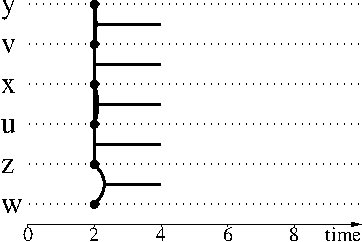

In [4]:
bip_s = BipartiteStream(_loglevel=logging.DEBUG)
core_property = StreamStarSat(bip_s, threshold=2)
bha_prop = StreamBHACore(bip_s, h=2, a=2)
core_property = bha_prop
bip_s.setCoreProperty(core_property)
bip_s.readStream(f"./tests/integration/fixtures/{basename}.json")
bip_s.draw()[1]

In [5]:
list(bip_s.core_property.interior(bip_s).W)

[u;[2,4], x;[2,4], v;[2,4], y;[2,4], w;[2,4], z;[2,4]]

In [6]:
bipatterns(bip_s)

a|b, w|x {generator object TimeNodeSet.values at 0x7f1e7896c410}
c|a|b, w|x {generator object TimeNodeSet.values at 0x7f1e7896c410}
c|a|b, w|y|x {generator object TimeNodeSet.values at 0x7f1e7896c410}
d|a|b, w|z|x {generator object TimeNodeSet.values at 0x7f1e7896c410}
a|b, w|y|x {generator object TimeNodeSet.values at 0x7f1e7896c410}


[(a|b, w|x {generator object TimeNodeSet.values at 0x7f1e7896c570}, set()),
 (c|a|b, w|x {generator object TimeNodeSet.values at 0x7f1e7896c570},
  {'left': {'a', 'b'}, 'right': {'w', 'x'}}),
 (c|a|b, w|y|x {generator object TimeNodeSet.values at 0x7f1e7896c570},
  {'left': {'a', 'b', 'c'}, 'right': {'w', 'x'}}),
 (d|a|b, w|z|x {generator object TimeNodeSet.values at 0x7f1e7896c570},
  {'left': {'a', 'b'}, 'right': {'w', 'x'}}),
 (a|b, w|y|x {generator object TimeNodeSet.values at 0x7f1e7896c570},
  {'left': {'a', 'b'}, 'right': {'w', 'x'}})]

In [7]:
bip_s.bipatterns_list[1][0].support_set

T: {'alpha': 0, 'omega': 10}
V: {'left': {'u', 'w'}, 'right': {'y', 'z', 'x'}},
W: {generator object TimeNodeSet.values at 0x7f1e7896c570},
E: (2, 4, u, x)
(2, 4, w, z)
(2, 4, u, y)
(2, 4, u, z)        

### Patterns on unipartite stream

Similarly, let us show an example of a toy unipartite stream on which we are interested in (mono)patterns.

In [8]:
# MonoPattern test
basename = "ChangingNeighbours-StSa"
json.load(open(f"./tests/integration/fixtures/{basename}.json"))

{'T': {'alpha': 0, 'omega': 10},
 'V': ['u', 'v', 'x', 'y'],
 'W': {},
 'E': [{'b': 1,
   'e': 5,
   'u': 'u',
   'v': 'v',
   'label_u': 'abcd',
   'label_v': 'abcd'},
  {'b': 1, 'e': 3, 'u': 'v', 'v': 'x', 'label_u': 'abcd', 'label_v': 'abc'},
  {'b': 2, 'e': 4, 'u': 'v', 'v': 'y', 'label_u': 'abcd', 'label_v': 'abd'}],
 'I': ['a', 'b', 'c', 'd']}

In [34]:
s = Stream(lang=set("abcd"), _loglevel=logging.DEBUG)
# s.readStream("./tests/integration/fixtures/ChangingNeighbours-StSa-Copy1.json")
# s.readStream(f"./tests/integration/fixtures/{basename}.json")
s.readStream(f"./data/highschool/High-School_data_2013.json")

{'T': {'alpha': 1386345580, 'omega': 1385982000},
 'V': ['1',
  '101',
  '103',
  '106',
  '1067',
  '111',
  '115',
  '116',
  '117',
  '119',
  '120',
  '1201',
  '1204',
  '1212',
  '1214',
  '1216',
  '1218',
  '122',
  '1228',
  '1232',
  '1237',
  '1238',
  '124',
  '125',
  '1260',
  '1295',
  '131',
  '132',
  '1320',
  '1324',
  '1332',
  '1336',
  '1339',
  '134',
  '1342',
  '1345',
  '1359',
  '1366',
  '1383',
  '14',
  '1401',
  '1412',
  '1423',
  '145',
  '147',
  '1485',
  '149',
  '15',
  '151',
  '1512',
  '1518',
  '1519',
  '1543',
  '156',
  '159',
  '1594',
  '160',
  '165',
  '170',
  '171',
  '172',
  '173',
  '176',
  '177',
  '1784',
  '179',
  '1805',
  '181',
  '1819',
  '1828',
  '184',
  '185',
  '1870',
  '1894',
  '190',
  '194',
  '196',
  '199',
  '20',
  '200',
  '201',
  '202',
  '205',
  '209',
  '21',
  '210',
  '211',
  '213',
  '214',
  '219',
  '220',
  '222',
  '226',
  '227',
  '232',
  '236',
  '239',
  '240',
  '241',
  '242',
  '243',
  '2

In [55]:
RESULTS = "./results"
DATASET = "highschool"
PROPERTY = "starsat"
k = 2
core_property = StreamStarSat(s, threshold=k)
s.setCoreProperty(core_property)

In [56]:
result = patterns(s)
print("0")

set() {generator object TimeNodeSet.values at 0x7f1e37ba21a8}
{'D_151', 'D_866'} {generator object TimeNodeSet.values at 0x7f1e37ba21a8}
{'F_691', 'F_642', 'F_582', 'F_387', 'F_615', 'F_34', 'F_869', 'D_151', 'F_634', 'F_753', 'F_201', 'D_866', 'F_502', 'F_564', 'F_151', 'C_MP', 'F_452', 'F_866'} {generator object TimeNodeSet.values at 0x7f1e37ba21a8}
{'F_582', 'D_691', 'D_151', 'F_634', 'F_753', 'D_866', 'F_577', 'F_866', 'F_691', 'F_615', 'F_151', 'F_34', 'F_502', 'F_564', 'F_452', 'F_642', 'F_387', 'F_869', 'F_201', 'C_MP', 'D_869'} {generator object TimeNodeSet.values at 0x7f1e37ba21a8}
{'F_582', 'D_691', 'D_151', 'F_634', 'F_753', 'D_866', 'F_38', 'F_577', 'F_866', 'F_691', 'D_634', 'D_642', 'F_615', 'F_151', 'F_34', 'D_452', 'F_502', 'F_564', 'F_452', 'F_642', 'F_387', 'F_869', 'F_201', 'G_M', 'C_MP', 'D_869'} {generator object TimeNodeSet.values at 0x7f1e37ba21a8}
{'F_582', 'D_691', 'D_151', 'F_634', 'F_753', 'D_866', 'F_577', 'F_866', 'F_513', 'F_691', 'F_615', 'D_502', 'F_151'

In [59]:
len(s.pattern_list)

4242

In [60]:
import ujson as json
json_patterns = [ p[0].json() for p in s.pattern_list ]
fp = open(f"{RESULTS}/{DATASET}/stream-{PROPERTY}-{k}.txt", "w+")
json.dump(json_patterns, fp)
fp.close()

<AxesSubplot:ylabel='Count'>

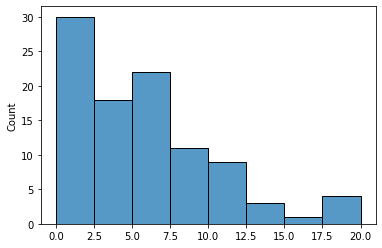

In [46]:
from lib.Utils import *
import seaborn as sns
nodes_per_pattern = [ len(p[0].lang) for p in s.pattern_list ]
sns.histplot(nodes_per_pattern) # how many nodes for each element of L?

{'F_425': 318, 'C_2BIO3': 316}

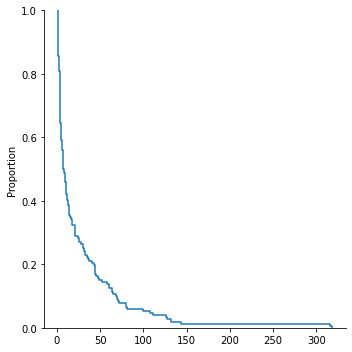

In [36]:
# Elements of L appear in how many patterns?
from collections import Counter
# x for sublist in my_list for x in sublist

_ = [list(p[0].lang) for p in s.bipatterns_list ]
num_patterns_per_node = Counter([ u for x in _ for u in x])
ax = sns.displot(num_patterns_per_node, kind="ecdf", complementary=True)
filtered_dict = {k: v for k, v in num_patterns_per_node.items() if v > 200 }
filtered_dict

run 1 : 4271

run 2: 

In [12]:
check_patterns([ p[0] for p in s.bipatterns_list ])

TypeError: 'Pattern' object does not support indexing

In [70]:
f_guillaume = open("highschool-starsat-4.txt", "w+")
for bp in s.bipatterns_list:
    print(bp[0].json(), file=f_guillaume)
f_guillaume.close()

In [6]:
s = Stream(lang=set("abcd"), _loglevel=logging.DEBUG)
s.readStream(f"/home/tiphaine/tmp/High-School_data_2013.json")

{'T': {'alpha': 1386345580, 'omega': 1385982000},
 'V': ['1',
  '101',
  '103',
  '106',
  '1067',
  '111',
  '115',
  '116',
  '117',
  '119',
  '120',
  '1201',
  '1204',
  '1212',
  '1214',
  '1216',
  '1218',
  '122',
  '1228',
  '1232',
  '1237',
  '1238',
  '124',
  '125',
  '1260',
  '1295',
  '131',
  '132',
  '1320',
  '1324',
  '1332',
  '1336',
  '1339',
  '134',
  '1342',
  '1345',
  '1359',
  '1366',
  '1383',
  '14',
  '1401',
  '1412',
  '1423',
  '145',
  '147',
  '1485',
  '149',
  '15',
  '151',
  '1512',
  '1518',
  '1519',
  '1543',
  '156',
  '159',
  '1594',
  '160',
  '165',
  '170',
  '171',
  '172',
  '173',
  '176',
  '177',
  '1784',
  '179',
  '1805',
  '181',
  '1819',
  '1828',
  '184',
  '185',
  '1870',
  '1894',
  '190',
  '194',
  '196',
  '199',
  '20',
  '200',
  '201',
  '202',
  '205',
  '209',
  '21',
  '210',
  '211',
  '213',
  '214',
  '219',
  '220',
  '222',
  '226',
  '227',
  '232',
  '236',
  '239',
  '240',
  '241',
  '242',
  '243',
  '2

In [ ]:
# Pattern set selection :)
from lib.similarities import *

k = 2
betas = [0.2, 0.4, 0.6, 0.8, 0.9, 1.0 ]
pattern_list = load_patterns(f"highschool-starsat-{k}.txt")

sort_fn = lambda x: len(x.support_set.W)
# pattern_list = sorted(pattern_list, key=sort_fn)

for beta in betas:
    print(beta)
    r = g_beta_selection(pattern_list, s, beta)
    print(beta, len(r))
    fp = open(f"highschool-starsat-{k}-beta-{beta}", "w+")
    for p in r:
        print(p.json(), file=fp)
    fp.close()

<class 'lib.Stream.Stream'>
0.2


### Load from external file

In [34]:
# Plot |W| vs |q|
import matplotlib.pyplot as plt

for beta in [0.2, 0.4, 0.6, 0.8, 0.9, 1.0]:
    patterns_list = load_patterns(f"highschool-starsat-{k}-beta-{beta}")
    print(beta, len(patterns_list))
    intent_len = [ len(p.lang) for p in patterns_list ]
    extent_len = [ len(p.support_set.W) for p in patterns_list ]

    plt.semilogy(intent_len, extent_len, '.', label=fr"$\beta$={beta}")

plt.xlabel("Intent size |q|")
plt.ylabel("Support set size |S| (log)")
plt.legend()
plt.savefig("hs327-patterns-beta.png")

0.2 1
0.4 1
0.6 1
0.8 1
0.9 1
1.0 1


In [3]:
r = load_patterns(f"highschool-starsat-4-beta-0.8")

<class 'lib.Stream.Stream'>


In [12]:
for p in r:
    if "364" in p.support_set.V and "101" in p.support_set.V and "117" in p.support_set.V and "196" in p.support_set.V and "240" in p.support_set.V:
        print(len(p.support_set.V), p.lang)

5 ['F_119', 'F_425', 'F_871', 'F_1', 'F_883', 'C_2BIO3', 'F_101']
18 ['F_425', 'F_101']
306 []


In [126]:
def shift_zero(s):
    
    shift_fn = lambda x: (x - cst_shift) / 20
    
    cst_shift = min([e["b"] for e in s.E])
    s_shifted = Stream()
    s_shifted.T["alpha"] = shift_fn(min([e["b"] for e in s.E]))
    s_shifted.T["omega"] = shift_fn(max([e["e"] for e in s.E]))
    W_shifted = TimeNodeSet()
    
    s_shifted.V = s.V
    
    for x in s.W:
        u = x.node
        b = shift_fn(x.b)
        e = shift_fn(x.e)
        w = TimeNode(u, b, e)
        W_shifted.add(w)
    s_shifted.W = W_shifted
    
    for e in s.E:
        f = e.copy()
        f["b"] = shift_fn(f["b"])
        f["e"] = shift_fn(f["e"])
        s_shifted.add_link(f)
    return s_shifted

#for i in range(1, 4): # len(s.bipatterns_list)):
#    print(i)
#    pattern_stream = s.bipatterns_list[i][0].support_set
#    subs_W = TimeNodeSet([TimeNode(u, pattern_stream.T["alpha"], pattern_stream.T["omega"]) for u in s.V ]) 
#    subs = s.substream(subs_W, subs_W)
#    s_shifted = shift_zero(subs)
#    s_shifted.draw(node_clusters=s_shifted.W.values())

In [ ]:
patterns_list = patterns_list[1:]
for i in range(len(patterns_list)):
    w = patterns_list[i].support_set
    s_w = shift_zero(s.substream(w.W, w.W))
    s_w.draw()


18 14 (128 percent improvement) 
14 8 (175 percent improvement) 
88 31 (283 percent improvement) 
10 6 (166 percent improvement) 
11 7 (157 percent improvement) 
13 7 (185 percent improvement) 
15 10 (150 percent improvement) 
32 15 (213 percent improvement) 


In [13]:
w = s.bipatterns_list[14][0].support_set
s_w = shift_zero(s.substream(w.W, w.W))
s.bipatterns_list[14][0].lang

{'C_MP',
 'F_151',
 'F_201',
 'F_564',
 'F_582',
 'F_634',
 'F_642',
 'F_691',
 'F_753'}

In [16]:
[ i for i in s.I if "C_" in i ] 

['C_2BIO1',
 'C_2BIO2',
 'C_2BIO3',
 'C_MP',
 'C_MP*1',
 'C_MP*2',
 'C_PC',
 'C_PC*',
 'C_PSI*']

## Interiors, core properties and pattern enumeration

In [20]:
res_int = interior(s)
res_b_int = interior(bip_s)
res_int, res_b_int

(T: {'alpha': 0, 'omega': 10}
 V: set(),
 W: {},
 E:         ,
 T: {'alpha': 0, 'omega': 10}
 V: {'left': {'v', 'u'}, 'right': {'y', 'x'}},
 W: {v;[1.5,4], x;[1,6], y;[1.5,4], u;[1,6]},
 E: (2, 4, v, x)
 (1.5, 3.5, v, y)
 (1, 6, u, x)
 (2, 4, u, y)        )

In [26]:
# Move to Stream etc. class
def mydraw(s, q, node_clusters=[]):
    basename = "ChangingNeighbours-StSa-Copy1"
    pattern_str = ''.join(sorted(q))
    
    s_draw = StreamFig.StreamFig(alpha=0, omega=5, streaming=False)
    _ = [s_draw.addNode(x) for x in s.nodes()]
    for l in s.E:
        if set([l["u"], l["v"]]) == set(["v", "y"]):
            s_draw.addLink(l["u"], l["v"], l["b"], l["e"], curving=0.2)
        else:
            s_draw.addLink(l["u"], l["v"], l["b"], l["e"])

    for nc in node_clusters:
        v, b, e, color = nc
        s_draw.addNodeCluster(v, [(b, e)], color=color)
    # s_draw.addTimeLine(ticks=2)
    s_draw.save(f"{basename}-{pattern_str}.fig")
    # For display
    from subprocess import call
    call(f"rm {basename}-{pattern_str}.png", shell=True)
    call(f"fig2dev -Lpng {basename}-{pattern_str}.fig > {basename}-{pattern_str}.png", shell=True)
    call(f"rm {basename}-{pattern_str}.fig", shell=True)
    
    return f"{basename}-{pattern_str}.png"


#my_nc = [ (x.node, x.b, x.e, 11) for x in res_int[0] ] 
#my_nc += [ (x.node, x.b, x.e, 12) for x in res_int[1] ] 
#mydraw(s, set('ab'), node_clusters=my_nc)

In [27]:
patterns(s)

{'a', 'b'} {u;[1,4], v;[1,4], x;[1,3], y;[2,4]}
{'a', 'd', 'b'} {u;[2,4], v;[2,4], y;[2,4]}
{'a', 'b', 'c'} {u;[1,3], v;[1,3], x;[1,3]}


[({'a', 'b'} {u;[1,4], v;[1,4], x;[1,3], y;[2,4]}, set()),
 ({'a', 'd', 'b'} {u;[2,4], v;[2,4], y;[2,4]}, {'a', 'b'}),
 ({'a', 'b', 'c'} {u;[1,3], v;[1,3], x;[1,3]}, {'a', 'b'})]

In [28]:
result = bipatterns(bip_s)

a|b, x|w {u;[1,5], v;[1,5], x;[1,3], y;[2,4]}
a|d|b, x|w {u;[1,5], v;[1,5], y;[2,4]}
a|d|b|c, x|w {u;[1,5], v;[1,5]}


In [29]:
result

[(a|b, x|w {u;[1,5], v;[1,5], x;[1,3], y;[2,4]}, set()),
 (a|d|b, x|w {u;[1,5], v;[1,5], y;[2,4]},
  {'left': {'a', 'b'}, 'right': {'w', 'x'}}),
 (a|d|b|c, x|w {u;[1,5], v;[1,5]},
  {'left': {'a', 'b', 'd'}, 'right': {'w', 'x'}})]

6 4 (150 percent improvement) 


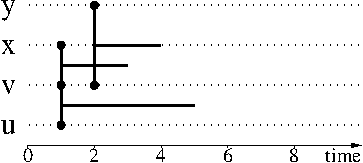

In [30]:
bip_s.draw()

a|d|b, x|w {u;[1,5], v;[1,5], y;[2,4]} a|d|b, x|w {u;[1,5], v;[1,5], y;[2,4]}
3 2 (150 percent improvement) 


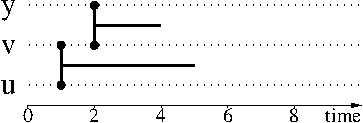

In [33]:
p, q = bip_s.bipatterns_list[1][0], bip_s.bipatterns_list[1][0]
print(p,q)
q.support_set.draw()

In [24]:
bipattern_similarity(bip_s, p, q)

0.0

In [9]:
# Move to patterns.py as draw_pattern_lattice ?

outf = open("bipatterns.dot", "w+")

print("digraph bips {", file=outf)

nodes = [ bp for bp in s.bipatterns_list]
edges = []

for x in s.bipatterns_list:
    bp, bp_parent = x
    basename = "ChangingNeighbours-StSa-Copy1"
    pattern_str = ''.join(sorted(bp.lang))
    
    subs = s.substream(bp.support_set[0], bp.support_set[1])
    
    my_nc = [ (x.node, x.b, x.e, 11) for x in bp.support_set[0] ] 
    my_nc += [ (x.node, x.b, x.e, 12) for x in bp.support_set[1] ]
    fname = mydraw(subs, bp.lang, node_clusters=my_nc)
    print(f'{pattern_str}[shape="plaintext", image="{basename}-{pattern_str}.png", label="{pattern_str}", labelloc="b", imagepos="tc"];', file=outf)
    
    edges.append((pattern_str, ''.join(sorted(bp_parent))))

for e in edges:
    if not (e[0] == '' or e[1] == ''):
        print(f'{e[1]} -> {e[0]}', file=outf)
print("}", file=outf)
outf.close()
from subprocess import call
call(f"dot -Tps bipatterns.dot -o outfile.ps", shell=True)

0